# COMP5046 Assignment 1
*Make sure you change the file name with your unikey.*

# Readme
*If there is something to be noted for the user, please mention here.* 

*If you are planning to implement a program with Object Oriented Programming style, please check the bottom of the this ipynb file*

***Visualising the comparison of different results is a good way to justify your decision.***

# 1 - Data Preprocessing

## 1.1. Download Dataset

If you want to know how data has been saved in pickle file: see this [ipynb file](https://drive.google.com/file/d/1ZQUVBzgH7N2EbiyE3WTPx7JNe2eRTs36/view?usp=sharing)

In [1]:
# Code to download file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

id = '1lTD6bgRkmwguGAr30v-r0KBPdtnVneLb'
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('testing_data.pkl')  

id = '1pCUdlZMoj99UZHtqFeza86fvVQfFmDFX'
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('training_data.pkl')  

import pickle
training_data = pickle.load(open("training_data.pkl","rb"))
testing_data = pickle.load(open("testing_data.pkl","rb"))

print("------------------------------------")
print("Size of training dataset: {0}".format(len(training_data)))
print("Size of testing dataset: {0}".format(len(testing_data)))
print("------------------------------------")

print("------------------------------------")
print("Sample Data")
print("LABEL: {0} / SENTENCE: {1}".format(training_data[0][0], training_data[0][1]))
print("------------------------------------")


------------------------------------
Size of training dataset: 8000
Size of testing dataset: 2000
------------------------------------
------------------------------------
Sample Data
LABEL: neg / SENTENCE: hopeless for tmr :(
------------------------------------


## 1.2. Preprocess data



Once I had the data, I first printed it out. I found a lot of URLs, usernames, etc. in the data. I first removed the data using regular expressions. because the URLs and usernames do not have much effect on the meaning of the sentences. Then,I started to remove punctuation. At this point there are still emoji and emoctions inside the sentence, so I'll start by replacing the emoji and emoctions with text descriptions. This made it easier to train later and also preserved the emotional information contained. Then I replaced the abbreviations in the sentence so that the punctuation could be removed without affecting the meaning of the words.

The second step is to tokenize the sentences. Then I removed stopwords and do Case-folding for words, because I think this words are not that meaningful for understand the sentences.

Finally,I lemmatisated words, so that it could grouping together the inflected forms of a word so they can be analysed as a single item 

In [2]:
# slip label and sentences
import numpy as np
print(training_data)
#tags, sentence= zip(*training_data)
def slip_sentences(tagged_sentences):
  sentences, sentence_tags =[], []
  #The zip() function returns a zip object, which is an iterator of tuples where the first item in each passed iterator is paired together, 
  #and then the second item in each passed iterator are paired together etc.
  tags, sentence= zip(*tagged_sentences)
  sentences=np.array(sentence)
  sentence_tags=np.array(tags)
  return sentences, sentence_tags 
train_sentences, train_tag=slip_sentences(training_data)
test_sentences, test_tag=slip_sentences(testing_data)

#print(train_sentences)
#print(train_tag)
#print(test_sentences)
#print(test_tag)

[('neg', 'hopeless for tmr :('), ('neg', "Everything in the kids section of IKEA is so cute. Shame I'm nearly 19 in 2 months :("), ('neg', '@Hegelbon That heart sliding into the waste basket. :('), ('neg', '“@ketchBurning: I hate Japanese call him "bani" :( :(”\n\nMe too'), ('neg', 'Dang starting next week I have "work" :('), ('neg', "oh god, my babies' faces :( https://t.co/9fcwGvaki0"), ('neg', '@RileyMcDonough make me smile :(('), ('neg', '@f0ggstar @stuartthull work neighbour on motors. Asked why and he said hates the updates on search :( http://t.co/XvmTUikWln'), ('neg', 'why?:("@tahuodyy: sialan:( https://t.co/Hv1i0xcrL2"'), ('neg', 'Athabasca glacier was there in #1948 :-( #athabasca #glacier #jasper #jaspernationalpark #alberta #explorealberta #… http://t.co/dZZdqmf7Cz'), ('neg', "I have a really good m&amp;g idea but I'm never going to meet them :((("), ('neg', '@Rampageinthebox mare ivan :('), ('neg', '@SophiaMascardo happy trip, keep safe. see you soon :* :('), ('neg', "I'm 

### Punctuation removal

In [3]:
import re
#URL_REGEX
URL_REGEX = re.compile(
        r'(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:\'".,<>?«»“”‘’]))',
        re.IGNORECASE)
'''————————————————
URL_REGEX refer to:
https://blog.csdn.net/blmoistawinde/article/details/103648044'''

'————————————————\nURL_REGEX refer to:\nhttps://blog.csdn.net/blmoistawinde/article/details/103648044'

In [4]:
# These are just common English contractions. There are many edge cases. i.e. University's working on it.
contraction_dict = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", 
                    "couldn't": "could not", "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", 
                    "hasn't": "has not", "haven't": "have not", "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", 
                    "how'd'y": "how do you", "how'll": "how will", "how's": "how is",  "I'd": "I would", "I'd've": "I would have", 
                    "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would", "i'd've": "i would have", 
                    "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would", 
                    "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", 
                    "ma'am": "madam", "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", 
                    "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have",
                    "o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", 
                    "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", 
                    "she's": "she is", "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have",
                    "so's": "so as", "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would", 
                    "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have", 
                    "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have", "wasn't": "was not", 
                    "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are", "we've": "we have", 
                    "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",  "what's": "what is", "what've": "what have", 
                    "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is", "where've": "where have", "who'll": "who will", 
                    "who'll've": "who will have", "who's": "who is", "who've": "who have", "why's": "why is", "why've": "why have", "will've": "will have", 
                    "won't": "will not", "won't've": "will not have", "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", 
                    "y'all": "you all", "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                    "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have", "you're": "you are", "you've": "you have"}

In [5]:
!sudo pip install emoji


     |████████████████████████████████| 133kB 9.3MB/s 


In [6]:
!sudo pip install emot

In [7]:
from emot.emo_unicode import UNICODE_EMO, EMOTICONS
import emoji
def convert_emoticons(text):
    for emot in EMOTICONS:
        text = re.sub(u'('+emot+')', "_".join(EMOTICONS[emot].replace(",","").split()), text)
    return text
#refer to https://www.kaggle.com/sudalairajkumar/getting-started-with-text-preprocessing

'''def convert_emojis(text):
    for emot in UNICODE_EMO:
        text = re.sub(r'('+emot+')', "_".join(UNICODE_EMO[emot].replace(",","").replace(":","").split()), text)
    return text'''

def remove_contraction(sentences):
  data_constra_removed=[]
  for sent in sentences:
    sent = re.sub(r"(reply)?(//)?\s*@\S*?\s*(:| |$)", " ", sent) #Remove username
    sent = re.sub(URL_REGEX, "", sent)       # Remove url
    sent = emoji.demojize(sent, delimiters=("", ""))      #replace emojis to word or describe of the img
    sent = convert_emoticons(sent)     #replace emoticons to word or describe
    #replace contraction words
    for k in contraction_dict:
        if k in sent:
            sent = sent.replace(k,contraction_dict[k])
    sent = re.sub(r'[^\w\s]','',sent)    #remove punct
    data_constra_removed.append(sent)
  return data_constra_removed 

train_sentences_no_constra=remove_contraction(train_sentences)
test_sentences_no_constra=remove_contraction(test_sentences)

print(train_sentences_no_constra)

['hopeless for tmr Frown_sad_andry_or_pouting', 'Everything in the kids section of IKEA is so cute Shame I am nearly 19 in 2 months Frown_sad_andry_or_pouting', ' That heart sliding into the waste basket Frown_sad_andry_or_pouting', '  I hate Japanese call him bani Frown_sad_andry_or_pouting Frown_sad_andry_or_pouting\n\nMe too', 'Dang starting next week I have work Frown_sad_andry_or_pouting', 'oh god my babies faces Frown_sad_andry_or_pouting ', ' make me smile Frown_sad_andry_or_pouting', '  work neighbour on motors Asked why and he said hates the updates on search Frown_sad_andry_or_pouting ', 'whyFrown_sad_andry_or_pouting  sialanFrown_sad_andry_or_pouting ', 'Athabasca glacier was there in 1948 Frown_sad_andry_or_pouting athabasca glacier jasper jaspernationalpark alberta explorealberta  ', 'I have a really good mampg idea but I am never going to meet them Frown_sad_andry_or_pouting', ' mare ivan Frown_sad_andry_or_pouting', ' happy trip keep safe see you soon Kiss Frown_sad_andr

### stop_words removal, case-folding and Lemmatisation

In [8]:
import regex
from nltk.tokenize import TweetTokenizer
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords as sw

nltk.download('wordnet')

from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
stop_words = sw.words()
tknzr = TweetTokenizer()
#Tokenisation
train_tokenized=[tknzr.tokenize(sent) for sent in train_sentences_no_constra]
test_tokenized=[tknzr.tokenize(sent) for sent in test_sentences_no_constra]

def clean_lemmatizer(train_tokenized):
  data_clear=[]
  for sent in train_tokenized:
    words=[]
    for word in sent:
      if (not word in stop_words )and (word !=''):   #remove stop_words
         
        temp=word.lower() #Case-folding
        temp_L=lemmatizer.lemmatize(temp)  #lemmatizer
        words.append(temp_L)
    data_clear.append(words)
  return data_clear

train_pred=clean_lemmatizer(train_tokenized)
test_pred=clean_lemmatizer(test_tokenized)        
        


print(train_pred)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[['hopeless', 'tmr', 'frown_sad_andry_or_pouting'], ['everything', 'kid', 'section', 'ikea', 'cute', 'shame', 'i', 'nearly', '19', '2', 'month', 'frown_sad_andry_or_pouting'], ['that', 'heart', 'sliding', 'waste', 'basket', 'frown_sad_andry_or_pouting'], ['i', 'hate', 'japanese', 'call', 'ban', 'frown_sad_andry_or_pouting', 'frown_sad_andry_or_pouting', 'me'], ['dang', 'starting', 'next', 'week', 'i', 'work', 'frown_sad_andry_or_pouting'], ['oh', 'god', 'baby', 'face', 'frown_sad_andry_or_pouting'], ['make', 'smile', 'frown_sad_andry_or_pouting'], ['work', 'neighbour', 'motor', 'asked', 'said', 'hate', 'update', 'search', 'frown_sad_andry_or_pouting'], ['whyfrown_sad_

Encode labels.

In [9]:
#preprocessing tag
label={'neg':0,'pos':1}
train_tag_pred=[label[x] for x in train_tag]
test_tag_pred=[label[x] for x in test_tag]

# 2 - Model Implementation

## 2.1. Word Embeddings

I started with fasttext, and after evaluating 3.1, I found that the semantic accuracy was consistently below 10%, so I trained the following model with word2vec, and when I compared the two models, I found that fasttext had a higher overall accuracy for the same dataset. So fasttext was used.


I thought the training dataset was too small for word embeddings, so I added ted subtitles for the word embeddings。

In [10]:
# download TED script data
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

id = '1B47OiEiG2Lo1jUY6hy_zMmHBxfKQuJ8-'
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('ted_en-20160408.xml') 

### 2.1.1. Data Preprocessing for Word Embeddings

I first get contents of <content> tag from the xml file, because content tag including content of ted. and then, I removed Sound-effect labels because this labels do not affect the script meaning. Then, I did case folding and punction remove punctuation to get clean word list. 

In [11]:
# For parsing our XML data
import re
from lxml import etree
import nltk
nltk.download('punkt') 
from nltk.tokenize import word_tokenize, sent_tokenize
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Please comment your code
targetXML=open('ted_en-20160408.xml', 'r', encoding='UTF8')

# Getting contents of <content> tag from the xml file
target_text = etree.parse(targetXML)
parse_text = '\n'.join(target_text.xpath('//content/text()'))

# Removing "Sound-effect labels" using regular expression (regex) (i.e. (Audio), (Laughter))
content_text = re.sub(r'\([^)]*\)', '', parse_text)

# Tokenising the sentence to process it by using NLTK library
sent_text=sent_tokenize(content_text)

# Removing punctuation and changing all characters to lower case
normalized_text = []
for string in sent_text:
     tokens = re.sub(r"[^a-z0-9]+", " ", string.lower())
     normalized_text.append(tokens)

# Tokenising each sentence to process individual word
sentences=[]
sentences=[word_tokenize(sentence) for sentence in normalized_text]
sentences.extend(train_pred)
print(sentences[:10])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[['here', 'are', 'two', 'reasons', 'companies', 'fail', 'they', 'only', 'do', 'more', 'of', 'the', 'same', 'or', 'they', 'only', 'do', 'what', 's', 'new'], ['to', 'me', 'the', 'real', 'real', 'solution', 'to', 'quality', 'growth', 'is', 'figuring', 'out', 'the', 'balance', 'between', 'two', 'activities', 'exploration', 'and', 'exploitation'], ['both', 'are', 'necessary', 'but', 'it', 'can', 'be', 'too', 'much', 'of', 'a', 'good', 'thing'], ['consider', 'facit'], ['i', 'm', 'actually', 'old', 'enough', 'to', 'remember', 'them'], ['facit', 'was', 'a', 'fantastic', 'company'], ['they', 'were', 'born', 'deep', 'in', 'the', 'swedish', 'forest', 'and', 'they', 'made', 'the', 'best', 'mechanical', 'calculators', 'in', 'the', 'world'], ['everybody', 'used', 'them'], ['and', 'what', 'did', 'facit', 'do', 'when', 'the', 'electronic', 'calculator', 'came', 'along'], ['they', 'continued',

### 2.1.2. Build Word Embeddings Model

According to 3.1 line charts, I found that when the dimension was increased, the lines changed very little. So to increase the speed I chose a dimension of 100. And as the window size increases the Semantic accuracy decreases, so I chose window size of 2.

In [12]:
# Please comment your code
from gensim.models import FastText
ft_cbow_model = FastText(sentences, size=100, window=2, min_count=5, workers=2, sg=0)

### 2.1.3. Train Word Embeddings Model

In [13]:
# Please comment your code

## 2.2. Lexicon Embeddings

### 2.2.1. Lexicon-based Embedding

Since we are doing semantic analysis, when we add the semantic tag of each word, the final prediction may be more accurate

In [63]:
!pip install -U -q PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials


auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

id = '1WUwduirCsZqWuUxFAbmpZAS91wNJ5Td1'
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('negative-words.txt')

id = '1t2WTnPSWTCsUMyIyQT-7lZAI-_YLhniD'
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('positive-words.txt')

In [14]:
# Please comment your code
from collections import defaultdict
Lexicon_embeddings_dic=defaultdict(int)
f_neg=open('/content/negative-words.txt', encoding='ISO-8859-1')
f_pos=open('/content/positive-words.txt', encoding='ISO-8859-1')
words_neg=f_neg.readlines()
words_pos=f_neg.readlines()
#print(words_neg)
for word in words_neg:
  if (not';'in word) and word[:-1]:
    Lexicon_embeddings_dic[word[:-1]]=1
for word in words_pos:
  if (not';'in word) and word[:-1]:
    Lexicon_embeddings_dic[word[:-1]]=2



In [15]:
import numpy as np
em_word_set = set() 
for sent in train_pred:
    for word in sent:
        em_word_set.add(word)
em_word_set.add('[PAD]')
em_word_set.add('[UNKOWN]')
word_list = list(em_word_set)
word_list.sort()
#print(word_list)
Lexicon_embeddings=np.zeros((len(word_list),3))
for i, word in enumerate(word_list):
  Lexicon_embeddings[i,Lexicon_embeddings_dic[word]]=1


## 2.3. Bi-directional RNN Sequence model

### 2.3.1. Apply/Import Word Embedding and Lexicon Embedding

In [16]:
# Please comment your code
emb_dim = ft_cbow_model.vector_size

emb_table = []
for i, word in enumerate(word_list):
    if word in ft_cbow_model:
        emb_table.append(np.concatenate((ft_cbow_model.wv[word],Lexicon_embeddings[i])))
    else:
        emb_table.append([0]*(emb_dim+3))
emb_table = np.array(emb_table)
print(emb_dim)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  


100


### 2.3.2. Build Sequence Model

In 3.3, I fixed the learning rate to 0.01 and found that the epoch was most accurate between 20 and 40, so I chose 40.

In [17]:
# Please comment your code
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from sklearn.metrics import accuracy_score
vocab_size = len(word_list)
class Bi_LSTM_Emb(nn.Module):
    def __init__(self):
        super(Bi_LSTM_Emb, self).__init__()
        self.emb = nn.Embedding(vocab_size, (emb_dim+3))
        # Initialize the Embedding layer with the lookup table we created 
        self.emb.weight.data.copy_(torch.from_numpy(emb_table))
        # Optional: set requires_grad = False to make this lookup table untrainable
        self.emb.weight.requires_grad = False

        self.lstm = nn.LSTM((emb_dim+3), n_hidden, batch_first =True, bidirectional=True)
        self.linear = nn.Linear(n_hidden*2, n_class)

    def forward(self, x):
        # Get the embeded tensor
        x = self.emb(x)        
        # we will use the returned h_n of shape (num_layers * num_directions, batch, hidden_size): tensor containing the hidden state for t = seq_len.
        # details of the outputs from nn.LSTM can be found from: https://pytorch.org/docs/stable/generated/torch.nn.LSTM.html
        lstm_out, (h_n,c_n) = self.lstm(x)
        # concat the last hidden state from two direction
        hidden_out =torch.cat((h_n[0,:,:],h_n[1,:,:]),1)
        z = self.linear(hidden_out)
        return z

### 2.3.3. Train Sequence Model

Note that it will not be marked if you do not display the Training Loss and the Number of Epochs in the Assignment 1 ipynb.


In [18]:
word_index = {}
ind = 0
for word in word_list:
    word_index[word] = ind
    ind += 1

In [19]:


len_list = [len(s) for s in (train_pred+test_pred)]
seq_length = max(len_list)

def encode_and_add_padding(sentences, seq_length, word_index):
    sent_encoded = []
    for sent in sentences:
        temp_encoded = [word_index[word] if word in word_index else word_index['[UNKOWN]'] for word in sent]
        if len(temp_encoded) < seq_length:
            temp_encoded += [word_index['[PAD]']] * (seq_length - len(temp_encoded))
        else:
            temp_encoded = temp_encoded[:seq_length]
        sent_encoded.append(temp_encoded)
    return sent_encoded

train_encoded = encode_and_add_padding(train_pred, seq_length, word_index)
test_encoded = encode_and_add_padding(test_pred, seq_length, word_index)

In [20]:
vocab_size = len(word_list)

n_class = 2
n_hidden = 32
learning_rate = 0.01
total_epoch = 40

In [21]:
import torch
#You can enable GPU here (cuda); or just CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Please comment your code
# Move the model to GPU
model = Bi_LSTM_Emb().to(device)
# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

input_torch = torch.from_numpy(np.array(train_encoded)).to(device)
targe_torch = torch.from_numpy(np.array(train_tag_pred)).view(-1).to(device)

In [22]:
for epoch in range(total_epoch):  
    
    # Set the flag to training
    model.train()
    
    # forward + backward + optimize
    optimizer.zero_grad()
    outputs = model(input_torch) 
    loss = criterion(outputs, targe_torch)
    loss.backward()
    optimizer.step()
    
    predicted = torch.argmax(outputs, -1)
    acc= accuracy_score(predicted.cpu().numpy(),targe_torch.cpu().numpy())

    print('Epoch: %d, loss: %.5f, train_acc: %.2f' %(epoch + 1, loss.item(), acc))

print('Finished Training')




Epoch: 1, loss: 0.68978, train_acc: 0.52
Epoch: 2, loss: 0.66528, train_acc: 0.56
Epoch: 3, loss: 0.63723, train_acc: 0.71
Epoch: 4, loss: 0.60156, train_acc: 0.75
Epoch: 5, loss: 0.53870, train_acc: 0.78
Epoch: 6, loss: 0.45324, train_acc: 0.82
Epoch: 7, loss: 0.35662, train_acc: 0.87
Epoch: 8, loss: 0.25142, train_acc: 0.92
Epoch: 9, loss: 0.22265, train_acc: 0.92
Epoch: 10, loss: 0.20418, train_acc: 0.92
Epoch: 11, loss: 0.14499, train_acc: 0.95
Epoch: 12, loss: 0.13866, train_acc: 0.96
Epoch: 13, loss: 0.10604, train_acc: 0.96
Epoch: 14, loss: 0.09426, train_acc: 0.97
Epoch: 15, loss: 0.07694, train_acc: 0.98
Epoch: 16, loss: 0.06433, train_acc: 0.98
Epoch: 17, loss: 0.05963, train_acc: 0.98
Epoch: 18, loss: 0.05473, train_acc: 0.98
Epoch: 19, loss: 0.04933, train_acc: 0.98
Epoch: 20, loss: 0.04334, train_acc: 0.99
Finished Training


# 3 - Evaluation


## 3.1. Word Embedding Evaluation
You are to apply Semantic-Syntactic word relationship tests for the trained word embeddings and visualise the result of Semantic-Syntactic word relationship tests.
Note that it will not be marked if you do not display it in the ipynb file.


(*Please show your empirical evidence*)

In [23]:
def evaluate_vectors(W, vocab, prefix='./eval/question-data/'):
    """Evaluate the trained word vectors on a variety of tasks"""

    filenames = [
        'capital-common-countries.txt', 'capital-world.txt', 'currency.txt',
        'city-in-state.txt', 'family.txt', 'gram1-adjective-to-adverb.txt',
        'gram2-opposite.txt', 'gram3-comparative.txt', 'gram4-superlative.txt',
        'gram5-present-participle.txt', 'gram6-nationality-adjective.txt',
        'gram7-past-tense.txt', 'gram8-plural.txt', 'gram9-plural-verbs.txt',
        ]

    # to avoid memory overflow, could be increased/decreased
    # depending on system and vocab size
    split_size = 100

    correct_sem = 0; # count correct semantic questions
    correct_syn = 0; # count correct syntactic questions
    correct_tot = 0 # count correct questions
    count_sem = 0; # count all semantic questions
    count_syn = 0; # count all syntactic questions
    count_tot = 0 # count all questions
    full_count = 0 # count all questions, including those with unknown words

    for i in range(len(filenames)):
        with open('%s/%s' % (prefix, filenames[i]), 'r') as f:
            full_data = [line.rstrip().split(' ') for line in f]
            full_count += len(full_data)
            data = [x for x in full_data if all(word in vocab for word in x)]

        if len(data) == 0:
            print("ERROR: no lines of vocab kept for %s !" % filenames[i])
            print("Example missing line:", full_data[0])
            continue

        indices = np.array([[vocab[word] for word in row] for row in data])
        ind1, ind2, ind3, ind4 = indices.T

        predictions = np.zeros((len(indices),))
        num_iter = int(np.ceil(len(indices) / float(split_size)))
        for j in range(num_iter):
            subset = np.arange(j*split_size, min((j + 1)*split_size, len(ind1)))

            pred_vec = (W[ind2[subset], :] - W[ind1[subset], :]
                +  W[ind3[subset], :])

            #cosine similarity if input W has been normalized
            dist = np.dot(W, pred_vec.T)


            for k in range(len(subset)):
                dist[ind1[subset[k]], k] = -np.Inf
                dist[ind2[subset[k]], k] = -np.Inf
                dist[ind3[subset[k]], k] = -np.Inf

            # predicted word index
            predictions[subset] = np.argmax(dist, 0).flatten()

        
        val = (ind4 == predictions) # correct predictions
        count_tot = count_tot + len(ind1)
        correct_tot = correct_tot + sum(val)
        if i < 5:
            count_sem = count_sem + len(ind1)
            correct_sem = correct_sem + sum(val)
        else:
            count_syn = count_syn + len(ind1)
            correct_syn = correct_syn + sum(val)

        #print("%s:" % filenames[i])
        #print('ACCURACY TOP1: %.2f%% (%d/%d)' %
         #   (np.mean(val) * 100, np.sum(val), len(val)))
        
    return correct_sem, correct_syn, correct_tot, count_sem, count_syn, count_tot, full_count


In [24]:
!git clone https://github.com/stanfordnlp/GloVe.git
def polt_data(para_list,X):
  Semantic_ac=[]
  syntactic=[]
  Total_ac=[]
  for par in para_list:
    if X==1:
      ft_cbow_model = FastText(sentences, size=par, window=5, min_count=5, workers=2, sg=0)
    if X==2:
      ft_cbow_model = FastText(sentences, size=100, window=par, min_count=5, workers=2, sg=0)
    ft_cbow_model.wv.save_word2vec_format('ted_cbow_ft.txt', binary=False)
    vectors_file="/content/ted_cbow_ft.txt"

    with open(vectors_file, 'r') as f:
      vectors = {}
      for line in f.readlines()[1:]: # we only need the embedding vectors starting from the second line 
        vals = line.rstrip().split(' ')
        vectors[vals[0]] = [float(x) for x in vals[1:]]

    vocab_words=list(vectors.keys())
    vocab_size = len(vocab_words)

    # create word->index and index->word converter
    vocab = {w: idx for idx, w in enumerate(vocab_words)}
    ivocab = {idx: w for idx, w in enumerate(vocab_words)}

    # create the embedding matrix of shape (vocab_size, dim)
    vector_dim = len(vectors[ivocab[0]])
    W = np.zeros((vocab_size, vector_dim))
    for word, v in vectors.items():
        if word == '<unk>':
            continue
        W[vocab[word], :] = v

    # normalize each word vector to unit length
    # Vectors are usually normalized to unit length before they are used for similarity calculation, making cosine similarity and dot-product equivalent.
    W_norm = np.zeros(W.shape)
    d = (np.sum(W ** 2, 1) ** (0.5))
    W_norm = (W.T / d).T
    correct_sem, correct_syn, correct_tot, count_sem, count_syn, count_tot, full_count = evaluate_vectors(W_norm, vocab, prefix='/content/GloVe/eval/question-data')
    Semantic_ac.append((100 * correct_sem / float(count_sem)))
    sy=100 * correct_syn / float(count_syn)
    syntactic.append(sy)
    
    Total_ac.append((100 * correct_tot / float(count_tot)))
  return Semantic_ac, syntactic, Total_ac



Cloning into 'GloVe'...
remote: Enumerating objects: 595, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 595 (delta 0), reused 1 (delta 0), pack-reused 592
Receiving objects: 100% (595/595), 222.33 KiB | 9.67 MiB/s, done.
Resolving deltas: 100% (338/338), done.


In [25]:

from gensim.models import Word2Vec

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

def polt_data_W2V(para_list,X):
  Semantic_ac=[]
  syntactic=[]
  Total_ac=[]
  for par in para_list:
    if X==1:
      ft_cbow_model = Word2Vec(sentences=sentences, size=par, window=5, min_count=5, workers=2, sg=0)
    if X==2:
      ft_cbow_model = Word2Vec(sentences=sentences, size=100, window=par, min_count=5, workers=2, sg=0)
    ft_cbow_model.wv.save_word2vec_format('ted_cbow_ft.txt', binary=False)
    vectors_file="/content/ted_cbow_ft.txt"

    with open(vectors_file, 'r') as f:
      vectors = {}
      for line in f.readlines()[1:]: # we only need the embedding vectors starting from the second line 
        vals = line.rstrip().split(' ')
        vectors[vals[0]] = [float(x) for x in vals[1:]]

    vocab_words=list(vectors.keys())
    vocab_size = len(vocab_words)

    # create word->index and index->word converter
    vocab = {w: idx for idx, w in enumerate(vocab_words)}
    ivocab = {idx: w for idx, w in enumerate(vocab_words)}

    # create the embedding matrix of shape (vocab_size, dim)
    vector_dim = len(vectors[ivocab[0]])
    W = np.zeros((vocab_size, vector_dim))
    for word, v in vectors.items():
        if word == '<unk>':
            continue
        W[vocab[word], :] = v

    # normalize each word vector to unit length
    # Vectors are usually normalized to unit length before they are used for similarity calculation, making cosine similarity and dot-product equivalent.
    W_norm = np.zeros(W.shape)
    d = (np.sum(W ** 2, 1) ** (0.5))
    W_norm = (W.T / d).T
    correct_sem, correct_syn, correct_tot, count_sem, count_syn, count_tot, full_count = evaluate_vectors(W_norm, vocab, prefix='/content/GloVe/eval/question-data')
    Semantic_ac.append((100 * correct_sem / float(count_sem)))
    sy=100 * correct_syn / float(count_syn)
    syntactic.append(sy)
    
    Total_ac.append((100 * correct_tot / float(count_tot)))
  return Semantic_ac, syntactic, Total_ac

In [27]:
Vector_dim=[100,200,300,400,500]
window_siz=[2,4,6,8,10]

V_Semantic_ac, V_syntactic, V_Total_ac=polt_data(Vector_dim,1)
W_Semantic_ac, W_syntactic, W_Total_ac=polt_data(window_siz,2)

In [28]:
V_Semantic_ac_W2V, V_syntactic_W2V, V_Total_ac_W2V=polt_data_W2V(Vector_dim,1)
W_Semantic_ac_W2V, W_syntactic_W2V, W_Total_ac_W2V=polt_data_W2V(window_siz,2)

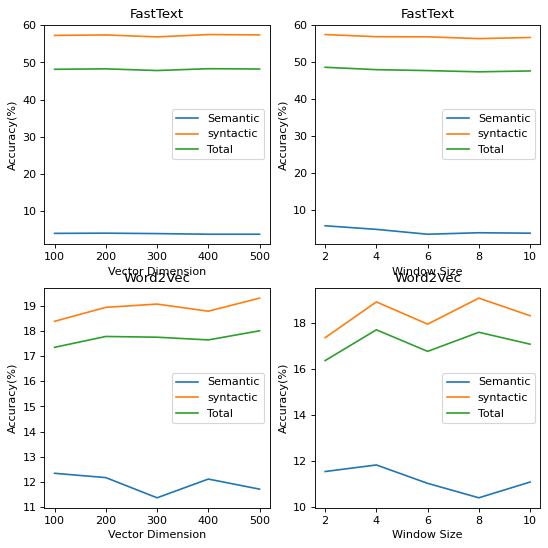

In [29]:
import matplotlib.pyplot as plt 
 
plt.figure(figsize=(8,8), dpi=80)
plt.figure(1)
ax1 = plt.subplot(221)
# plotting the first plot
ax1.plot(Vector_dim, V_Semantic_ac, label = "Semantic") 
# plotting the second plot 
ax1.plot(Vector_dim, V_syntactic, label = "syntactic")
# plotting the second plot 
ax1.plot(Vector_dim, V_Total_ac, label = "Total") 
  
# Labeling the X-axis 
ax1.set_xlabel('Vector Dimension') 
# Labeling the Y-axis 
ax1.set_ylabel('Accuracy(%)') 
# Give a title to the graph
ax1.set_title('FastText') 
  
# Show a legend on the plot 
ax1.legend()
ax2 = plt.subplot(222)
ax2.plot(window_siz, W_Semantic_ac, label = "Semantic")  
ax2.plot(window_siz, W_syntactic, label = "syntactic") 
ax2.plot(window_siz, W_Total_ac, label = "Total") 
ax2.set_xlabel('Window Size') 
# Labeling the Y-axis 
ax2.set_ylabel('Accuracy(%)') 
# Give a title to the graph
ax2.set_title('FastText') 
  
# Show a legend on the plot 
ax2.legend()

ax3 = plt.subplot(223)
# plotting the first plot
ax3.plot(Vector_dim, V_Semantic_ac_W2V, label = "Semantic") 
# plotting the second plot 
ax3.plot(Vector_dim, V_syntactic_W2V, label = "syntactic")
# plotting the second plot 
ax3.plot(Vector_dim, V_Total_ac_W2V, label = "Total") 
  
# Labeling the X-axis 
ax3.set_xlabel('Vector Dimension') 
# Labeling the Y-axis 
ax3.set_ylabel('Accuracy(%)') 
# Give a title to the graph
ax3.set_title('Word2Vec') 
  
# Show a legend on the plot 
ax3.legend()

ax4 = plt.subplot(224)
ax4.plot(window_siz, W_Semantic_ac_W2V, label = "Semantic")  
ax4.plot(window_siz, W_syntactic_W2V, label = "syntactic") 
ax4.plot(window_siz, W_Total_ac_W2V, label = "Total") 
ax4.set_xlabel('Window Size') 
# Labeling the Y-axis 
ax4.set_ylabel('Accuracy(%)') 
# Give a title to the graph
ax4.set_title('Word2Vec') 
  
# Show a legend on the plot 
ax4.legend()
 
plt.show()

## 3.2. Performance Evaluation


You are required to provide the table with precision, recall, f1 of test set.
Note that it will not be marked if you do not display it in the ipynb file.


(*Please show your empirical evidence*)

In [30]:
# Please comment your code
## Prediction
model.eval()
outputs = model(torch.from_numpy(np.array(test_encoded)).to(device)) 
predicted = torch.argmax(outputs, 1)

# classification_report builds a text report showing the main classification metrics
# The returned report includes the 'weighted avg f1' we want (refer to the sample output)
# More details can be found from: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html
from sklearn.metrics import classification_report
print(classification_report(test_tag_pred, predicted.cpu().numpy(),digits=4))

              precision    recall  f1-score   support

           0     0.9816    0.9580    0.9696      1000
           1     0.9590    0.9820    0.9704      1000

    accuracy                         0.9700      2000
   macro avg     0.9703    0.9700    0.9700      2000
weighted avg     0.9703    0.9700    0.9700      2000



## 3.3. Hyperparameter Testing
*You are required to draw a graph(y-axis: f1, x-axis: epoch) for test set and explain the optimal number of epochs based on the learning rate you have already chosen.* Note that it will not be marked if you do not display it in the ipynb file.


(*Please show your empirical evidence*)

In [ ]:
# Please comment your code

In [31]:
from sklearn.metrics import f1_score
def train_mod(epoch_list):
  f1_list=[]
  for epoch in epoch_list:
    for epoch in range(total_epoch):  
      
      # Set the flag to training
      model.train()
      
      # forward + backward + optimize
      optimizer.zero_grad()
      outputs = model(input_torch) 
      loss = criterion(outputs, targe_torch)
      loss.backward()
      optimizer.step()
      
      predicted = torch.argmax(outputs, -1)
      acc= accuracy_score(predicted.cpu().numpy(),targe_torch.cpu().numpy())
      model.eval()
    outputs = model(torch.from_numpy(np.array(test_encoded)).to(device)) 
    predicted = torch.argmax(outputs, 1)
    f1=f1_score(test_tag_pred, predicted.cpu().numpy(), average='micro')
    f1_list.append(f1)
  return f1_list


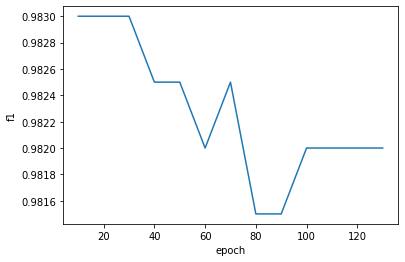

In [52]:
epoch_list=[10,20,30,40,50,60,70,80,90,100,110,120,130]
f1_list=train_mod(epoch_list)

import matplotlib.pyplot as plt 
 

plt.plot(epoch_list, f1_list)
plt.xlabel('epoch') 
plt.ylabel('f1')
plt.show() 



## Object Oriented Programming codes here

*You can use multiple code snippets. Just add more if needed* 

In [ ]:
# If you used OOP style, use this section